In [7]:
import torch
import torch.nn.functional as F
import math

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.size(-1)

    # Step 1: Compute raw attention scores
    scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

    # Step 2: Apply softmax to get attention weights
    attn_weights = F.softmax(scores, dim=-1)

    # Step 3: Multiply weights with V
    output = torch.matmul(attn_weights, V)

    return output, attn_weights


In [5]:
def masked_scaled_dot_product_attention(Q, K, V):

    d_k = Q.size(-1)
    seq_len = Q.size(0)

    scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

    # Create upper triangular mask
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1)
    scores = scores.masked_fill(mask == 1, float('-inf'))

    # Softmax after masking
    attn_weights = F.softmax(scores, dim=-1)

    output = torch.matmul(attn_weights, V)

    return output, attn_weights


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

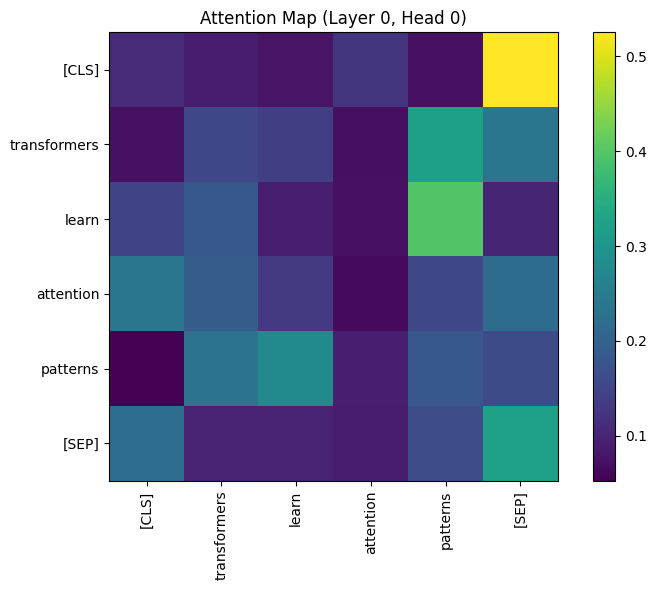

In [6]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)

model.eval()
sentence = "Transformers learn attention patterns"
inputs = tokenizer(sentence, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Attention shape: (layers, batch, heads, seq_len, seq_len)
attentions = outputs.attentions
layer = 0
head = 0

attention_map = attentions[layer][0][head].numpy()
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

plt.figure(figsize=(8, 6))
plt.imshow(attention_map)
plt.colorbar()
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.title("Attention Map (Layer 0, Head 0)")
plt.tight_layout()
plt.show()
